# end_to_end_pipeline (전체 과정)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터셋 준비

##### 데이터 불러오기 및 확인

In [5]:
# 데이터 준비

housing_df = pd.read_csv('data-files/california-housing.csv')

In [ ]:
housing_df.info()
# RangeIndex: 20640 > 전체 20640행
# total_bedrooms > 20433 > 결측치 있음
# ocean_proximity > object > 인코딩 예상

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing_df.head()
# 섹터 단위 > 집 단위 아님

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# 범주형 확인
housing_df['ocean_proximity'].unique()
# > ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

housing_df['ocean_proximity'].value_counts()
# 범주별 갯수
    # <1H OCEAN     9136
    # INLAND        6551
    # NEAR OCEAN    2658
    # NEAR BAY      2290
    # ISLAND           5

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
# 기본 통계량 확인 > 수치형만 처리해줌
housing_df.describe() 
# 컬럼마다 값 차이가 심함 > 스케일링 필요
# median_income 소득은 가공된 느낌

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


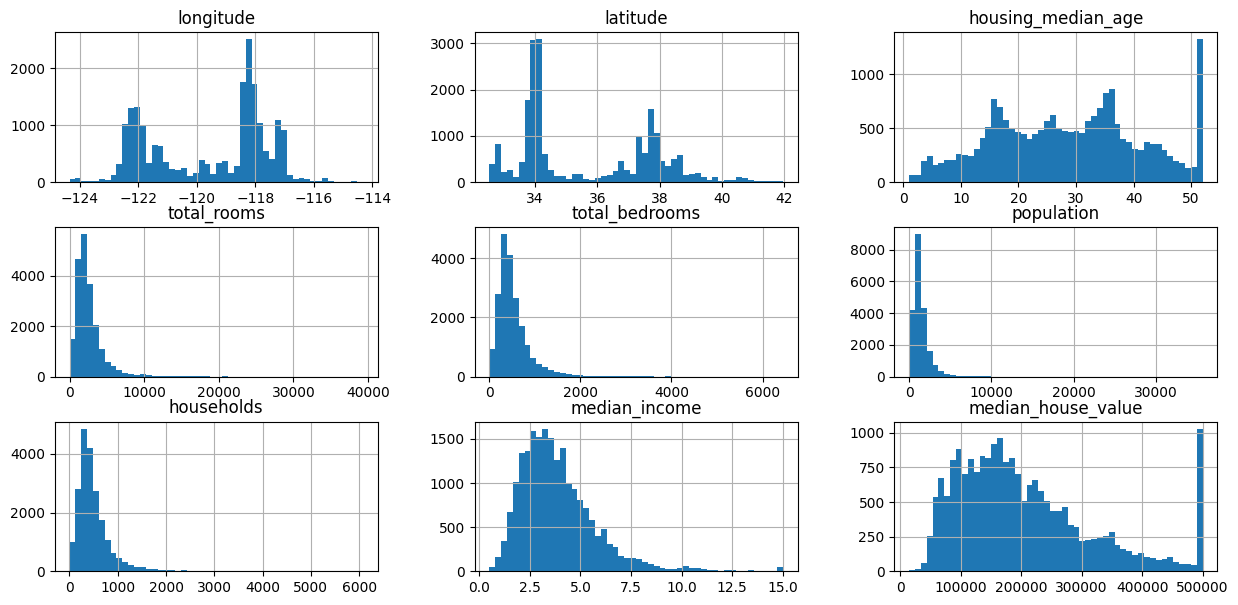

In [17]:
# 데이터프레임 내장 시각화 기능 사용
housing_df.hist(bins=50, figsize=(15, 7))
plt.show()

In [18]:
housing_df['housing_median_age'].max()

np.float64(52.0)

##### 훈련/테스트 데이터 나누기

In [34]:
from sklearn.model_selection import train_test_split

X = housing_df.drop("median_house_value", axis=1)
y = housing_df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # 기존 방법

train_set, test_set = train_test_split(housing_df, random_state=42)         # 같은 결과 다른 방법

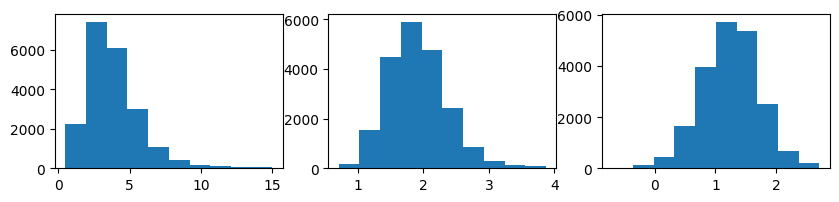

In [ ]:
# 소득 시각화

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 2)
axes[0].hist(housing_df['median_income'])
axes[1].hist(np.sqrt(housing_df['median_income'].values))
axes[2].hist(np.log(housing_df['median_income'].values))
plt.show()


In [ ]:
# 소득 기준 그룹 분할
housing_df["income_category"] = np.ceil(housing_df['median_income'] / 1.5)
# ceil > 올림, 현재 숫자보다 큰 수 중 가장 작은 정수
housing_df['income_category'].where(housing_df['income_category'] < 5, 5, inplace=True)
# where(condition, value_if_false, value_if_true)
# pandas의 where는 (조건, False값) 구조 > True면 원래 값을 반환 > T값 따로 지정 안 함
# numpy의 where는 (조건, True값, False값) 구조

C:\Users\human\AppData\Local\Temp\ipykernel_5632\4048697331.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_df['income_category'].where(housing_df['income_category'] < 5, 5, inplace=True)


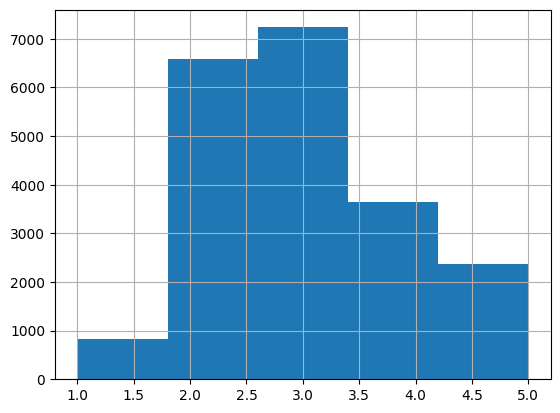

In [45]:
# housing_df['income_category'].value_counts
housing_df['income_category'].hist(bins=5)
plt.show()

In [46]:
# 소득 수준 그룹을 기준으로 훈련 세트와 테스트 세트의 분포 유지
stratified_train_set, stratified_test_set = \
    train_test_split(housing_df, stratify=housing_df['income_category'], random_state=42)

In [47]:
stratified_train_set.drop(['income_category'], axis=1, inplace=True)
stratified_test_set.drop(['income_category'], axis=1, inplace=True)


여기까지 데이터셋 준비

이후에 전처리 작업 있음 전처리, 범주화 등등

### 데이터 전처리

##### 결측치

In [49]:
# 결측치 확인
stratified_train_set.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        149
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [68]:
# # 결측값 처리
# from sklearn.impute import SimpleImputer
# # SimpleImputer 특정한 값으로 변환하는 도구

# # SimpleImputer(strategy="mean").fit_transform(stratified_train_set[['total_bedrooms']]) 
# # # 전략은 평균 > 선택된 컬럼의 미싱밸류는 평균으로 입력


# # 전체를 대상으로 미싱밸류는 전부 평균 사용 > object컬럼은 알아서 제외
# # train을 대상으로 작업
# imputed_train_set = SimpleImputer(strategy="mean") \
# .fit_transform(stratified_train_set.drop('ocean_proximity', axis=1))
# # test를 대상으로 작업
# imputed_test_set = SimpleImputer(strategy="mean") \
#     .fit_transform(stratified_test_set.drop('ocean_proximity', axis=1))

In [69]:
# 결측값 처리

# stratified_train_set.isna().sum()

from sklearn.impute import SimpleImputer

# SimpleImputer(strategy="mean").fit_transform(stratified_train_set[['total_bedrooms']])
train_imputer = SimpleImputer(strategy="mean")
imputed_train_set = train_imputer\
    .fit_transform(stratified_train_set.drop('ocean_proximity', axis=1))

test_imputer = SimpleImputer(strategy="mean")
# imputed_test_set = test_imputer\
#     .fit_transform(stratified_test_set.drop('ocean_proximity', axis=1))
imputed_test_set = train_imputer\
    .transform(stratified_test_set.drop('ocean_proximity', axis=1))

In [70]:
np.isnan(imputed_train_set).sum(), np.isnan(imputed_test_set).sum()

(np.int64(0), np.int64(0))

In [ ]:
housing_df.head(2)
# 섹터단위라서 total_rooms, total_bedrooms, population 있어도 집에 몇개씩인지 모른다.
# households(가구수)가 있으니, 이걸 기준으로 나눠서 보면 가구당 얼마인지 알 수 있다.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0


In [75]:
# total_rooms, total_bedrooms, population을 households당 값으로 변환해서 사용
        # 이걸 하기위해 보통 떠올리는 코드는 아래와 같지
        # imputed_train_set['rooms_per_households'] = \
        #     imputed_train_set['total_rooms'] / imputed_train_set['households']

# 근데 우리는 파이프라인에 넣고싶어. 그러려면 estimator여야하고, estimator되려면 상속 받아야해
# 그러므로 변환기를 만들어서 사용해아한다.(아래 코드)

##### estimator 만들기

In [76]:
# 변환기를 만들어서 사용

# BaseEstimator : scikit-learn 변환기 공통(부모) 클래스
# TransformerMixin : scikit-learn 변환기에 fit_transform 함수를 추가하는 Mixin
from sklearn.base import BaseEstimator, TransformerMixin

class HousingAttributesAdder(BaseEstimator, TransformerMixin):
# HousingAttributesAdder 클래스 만들기
# estimator로 만들기 위해 BaseEstimator 상속
# TransformerMixin 선택 사항, 넣는다면 자동으로 fit_transform이 만들어져 자동 추가됨

    def __init__(self, include_bedrooms_per_rooms=True):
        self.include_bedrooms_per_rooms = include_bedrooms_per_rooms
        pass

    def fit(self, X, y=None): # BaseEstimator에서 상속한 함수 재정의 -> Pipeline에서 동작하도록
        return self

    def transform(self, X, y=None): # BaseEstimator에서 상속한 함수 -> Pipeline에서 동작하도록
        rooms_per_household = X[:, 3] / X[:, 6] # 방수 / 가구수
        population_per_household = X[:, 5] / X[:, 6] # 인구수 / 가구수
        if self.include_bedrooms_per_rooms:
            bedrooms_per_rooms = X[:, 4] / X[:, 3] # 침실수 / 방수
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_rooms]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
# 변환기 테스트 1 
attr_adder = HousingAttributesAdder()
transformed = attr_adder.fit_transform(imputed_train_set)

imputed_train_set.shape, transformed.shape

((15480, 9), (15480, 12))

##### 파이프라인

In [ ]:
# 변환기 테스트 2

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(SimpleImputer(strategy="mean"),
                         HousingAttributesAdder(),
                         StandardScaler())

# 훈련에 적용
pipeline.fit_transform(stratified_train_set.drop("ocean_proximity", axis=1))
# 테스트에 적용
pipeline.transform(stratified_test_set.drop("ocean_proximity", axis=1))
# 할 때 마다 컬러 제외하는 문제 발생 > 자동화해보자 아래처럼

array([[ 0.68716675, -0.71106932,  0.97659303, ..., -0.50655742,
         0.02730817,  0.70810928],
       [-1.34849802,  2.27572632, -0.61453863, ...,  0.16548655,
        -0.01714154, -0.23195692],
       [-1.27365741,  0.94618092, -0.77365179, ..., -0.30046883,
        -0.0740924 , -0.29183967],
       ...,
       [ 0.69215613, -0.84683276,  0.10147062, ..., -0.55343442,
        -0.10258321,  0.45263177],
       [-1.24372116,  0.80573599, -0.61453863, ...,  0.98390416,
        -0.0267528 , -1.18483954],
       [-1.33851928,  1.18025582, -0.45542546, ...,  0.27176029,
         0.02449508, -0.59011856]])

In [82]:
# 변환기 만들기 2 : 선택한 컬럼만 추출하는 변환기 ( 수치형 속성과 범주형 속성 분리 목적 )

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attr_names):
        self.attr_names = attr_names

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attr_names].values

In [ ]:
# 파이프 라인 생성

from sklearn.preprocessing import OneHotEncoder

num_columns = stratified_train_set.columns[:-1] # 마지막이 ocean_proximity
category_columns = stratified_train_set.columns[-1:]
# transformed = ColumnSelector(num_columns).fit_transform(stratified_train_set)
# stratified_train_set.shape, transformed.shape

# 수치형 컬럼 파이프라인 - num_columns
num_pipeline = Pipeline([("selector", ColumnSelector(num_columns)),
                         ('imputer', SimpleImputer(strategy="mean")),
                         ('attr_adder', HousingAttributesAdder()),
                         ('std_scaler', StandardScaler())])

# 범주형 컬럼 파이프라인 - category_columns
category_pipeline = Pipeline([("selector", ColumnSelector(category_columns)),
                              ("category_encoder", OneHotEncoder())])

# 파이프라인 2개 만듦 
# 아래에서 둘을 병합

In [85]:
from sklearn.pipeline import FeatureUnion # 파이프라인을 결합해서 일괄처리하는 도구
# 파이프라인 결합

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline), 
                                               ("category_pipeline", category_pipeline)])

In [ ]:
# 이렇게 파이프라인 만들었다면, 마지막으로 호출할 것이
transformed_train_set = full_pipeline.fit_transform(stratified_train_set)
transformed_test_set = full_pipeline.transform(stratified_test_set)
# 여기에 더 붙을 것은 모델

In [ ]:
# pipeline2 = make_pipeline(full_pipeline, LogisticRegression())
# # > 이런식으로 하면 처음부터 끝까지 다 되는 것